In [1]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point


In [2]:
# Read the Excel workbook
OZ_file_path = 'C:/Users/Praveenaa/Desktop/Resilience/AQI_data/daily_44201_2022/daily_44201_2022.csv'
PM25_file_path = 'C:/Users/Praveenaa/Desktop/Resilience/AQI_data/daily_81102_2022/daily_81102_2022.csv'
PM10_file_path = 'C:/Users/Praveenaa/Desktop/Resilience/AQI_data/daily_88101_2022/daily_88101_2022.csv'

df_OZ = pd.read_csv(OZ_file_path)
df_PM25 = pd.read_csv(PM25_file_path)
df_PM10 = pd.read_csv(PM10_file_path)

C:\Users\Praveenaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Keeping only Arizona records. State code 4
df_OZ = df_OZ[df_OZ['State Code'] == 4]
df_PM25 = df_PM25[df_PM25['State Code'] == 4]
df_PM10 = df_PM10[df_PM10['State Code'] == 4]

In [4]:
df_PM25['Arithmetic Mean']

2586      6
2587     11
2588     28
2589     17
2590     12
         ..
13106    35
13107    63
13108    25
13109    22
13110    11
Name: Arithmetic Mean, Length: 10525, dtype: int64

In [5]:
# Group by 'Address' and calculate the average of 'Arithmetic Mean'
OZ_df_grouped = df_OZ.groupby('Address').mean().reset_index()


In [6]:
PM25_df_grouped = df_PM25.groupby('Address').mean().reset_index()


In [7]:
PM10_df_grouped = df_PM10.groupby('Address').mean().reset_index()


In [8]:
PM10_df_grouped

,Address,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code
0,10844 EAST OSBORN ROAD SCOTTSDALE AZ 85256,4.0,13.0,7020.0,88101.0,1.302326,33.488131,-111.855443,1.000000,100.000000,7.072093,7.072093,0.000000,29.046512,143.000000
1,"1525 S COLLEGE AVE, TEMPE",4.0,13.0,4005.0,88101.0,3.000000,33.411230,-111.934710,12.316038,99.261792,8.461279,13.395283,5.988208,34.764151,182.000000
2,2323 S ARIZONA AVE,4.0,27.0,8011.0,88101.0,3.000000,32.690278,-114.614440,12.450835,99.534323,8.770403,18.233210,5.734694,34.317164,170.000000
3,2702 RC ESTERBROOKS BLVD,4.0,13.0,9812.0,88101.0,3.000000,33.426500,-112.118210,12.286730,98.912322,8.867306,15.740047,4.995261,35.147619,182.000000
4,300 N MORLEY AVE,4.0,23.0,4.0,88101.0,2.894366,31.337204,-110.936718,11.808099,99.320423,8.442002,14.727289,5.096831,33.299663,167.308970
5,"310 S BROOKS, MESA",4.0,13.0,1003.0,88101.0,3.000000,33.410180,-111.865360,12.272494,97.724936,6.640977,11.991517,6.370180,27.402116,182.000000
6,"33 W TAMARISK AVE, PHOENIX",4.0,13.0,4003.0,88101.0,3.000000,33.403140,-112.075260,12.266187,98.482014,11.303828,19.146043,6.407674,43.325243,182.000000
7,"3401 W ORANGE GROVE RD, TUCSON",4.0,19.0,11.0,88101.0,3.000000,32.322661,-111.038389,12.381215,99.524862,5.403460,9.245856,5.502762,22.491713,170.000000
8,3847 W EARLL DR-WEST PHOENIX STATION,4.0,13.0,19.0,88101.0,2.969555,33.483780,-112.142560,11.971897,98.611241,9.082555,15.195785,5.262295,35.640553,179.843049
9,"3955 E SUPERSTITION BLVD, APACHE JUNCTION",4.0,21.0,3002.0,88101.0,1.000000,33.421194,-111.503222,1.000000,100.000000,5.401695,5.401695,0.000000,22.440678,145.000000


In [9]:
PM10_df_grouped = PM10_df_grouped.rename(columns={'Arithmetic Mean': 'PM10'})
PM25_df_grouped = PM25_df_grouped.rename(columns={'Arithmetic Mean': 'PM25'})
OZ_df_grouped = OZ_df_grouped.rename(columns={'Arithmetic Mean': 'OZ'})

In [10]:
# Specify the column names to keep
columns_to_keep_OZ = ['Address', 'Latitude', 'Longitude', 'OZ'] 
columns_to_keep_PM25 = ['Address', 'Latitude', 'Longitude', 'PM25'] 
columns_to_keep_PM10 = ['Address', 'Latitude', 'Longitude', 'PM10'] 

# Keep only the desired columns
OZ_subset_df = OZ_df_grouped[columns_to_keep_OZ]
PM25_subset_df = PM25_df_grouped[columns_to_keep_PM25]
PM10_subset_df = PM10_df_grouped[columns_to_keep_PM10]

print(OZ_subset_df)

                                              Address   Latitude   Longitude  \
0                        10 S QUEEN ANN  QUEEN VALLEY  33.293465 -111.285594   
1          10844 EAST OSBORN ROAD SCOTTSDALE AZ 85256  33.488131 -111.855443   
2                            11330 S HOUGHTON, TUCSON  32.047670 -110.774357   
3                                   1200 Commerce Dr.  34.612055 -112.463213   
4                     12101 N CAMINO DE OESTE, TUCSON  32.425261 -111.063520   
5                            1237 S. BEVERLY , TUCSON  32.204411 -110.878067   
6         15115 BEELINE HIGHWAY, SCOTTSDALE, AZ 86256  33.507992 -111.755334   
7                           1525 S COLLEGE AVE, TEMPE  33.411230 -111.934710   
8            16426 E PALISADES BLVD,FOUNTAIN HILLS,AZ  33.610920 -111.725340   
9             1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  33.457970 -112.046590   
10                                    16825 N. DYSART  33.637180 -112.341850   
11            18791 Yuma Frank Road, Ft.

(array([ 7.,  6., 10.,  8.,  5.,  7.,  2.]),
 array([0.0329733 , 0.03533085, 0.03768839, 0.04004594, 0.04240349,
        0.04476104, 0.04711858, 0.04947613]),
 <BarContainer object of 7 artists>)

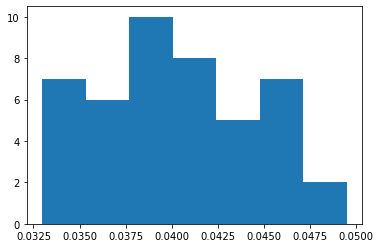

In [17]:
import matplotlib.pyplot as plt

plt.hist(OZ_subset_df['OZ'], bins='auto')

<AxesSubplot:xlabel='OZ'>

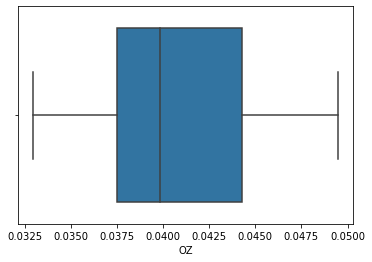

In [18]:
import seaborn as sns

sns.boxplot(x=OZ_subset_df['OZ'])

<AxesSubplot:xlabel='OZ'>

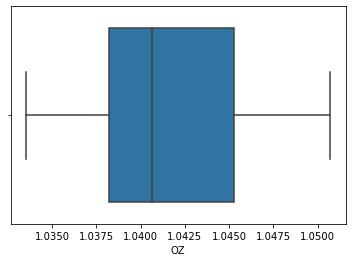

In [27]:
sns.boxplot(x=np.exp(OZ_subset_df['OZ']))

<AxesSubplot:>

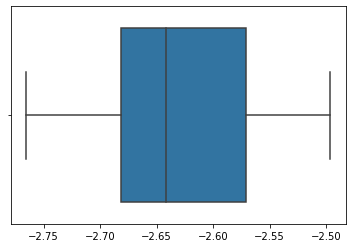

In [30]:
from scipy import stats

transformed, _ = stats.boxcox(OZ_subset_df['OZ'].values)
sns.boxplot(x=transformed)

In [32]:
# Convert DataFrame to GeoDataFrame
gdf_OZ = gpd.GeoDataFrame(OZ_subset_df, geometry=gpd.points_from_xy(OZ_subset_df['Longitude'], OZ_subset_df['Latitude']))
gdf_PM10 = gpd.GeoDataFrame(PM10_subset_df, geometry=gpd.points_from_xy(PM10_subset_df['Longitude'], PM10_subset_df['Latitude']))
gdf_PM25 = gpd.GeoDataFrame(PM25_subset_df, geometry=gpd.points_from_xy(PM25_subset_df['Longitude'], PM25_subset_df['Latitude']))


In [33]:
gdf_OZ = gdf_OZ.drop(columns=['Address','Latitude','Longitude'])
gdf_PM10 = gdf_PM10.drop(columns=['Address','Latitude','Longitude'])
gdf_PM25 = gdf_PM25.drop(columns=['Address','Latitude','Longitude'])

In [36]:

gdf_OZ['transformed'], _ = stats.boxcox(gdf_OZ['OZ'].values)
# gdf_OZ

,OZ,geometry,transformed
0,0.048004,POINT (-111.28559 33.29346),-2.516943
1,0.038835,POINT (-111.85544 33.48813),-2.658837
2,0.039165,POINT (-110.77436 32.04767),-2.653242
3,0.039348,POINT (-112.46321 34.61205),-2.650160
4,0.040212,POINT (-111.06352 32.42526),-2.635775
5,0.038274,POINT (-110.87807 32.20441),-2.668438
6,0.040456,POINT (-111.75533 33.50799),-2.631755
7,0.035664,POINT (-111.93471 33.41123),-2.714790
8,0.045079,POINT (-111.72534 33.61092),-2.559427
9,0.033487,POINT (-112.04659 33.45797),-2.755762


In [124]:
gdf_PM10

,PM10,geometry
0,7.072093,POINT (-111.85544 33.48813)
1,8.461279,POINT (-111.93471 33.41123)
2,8.770403,POINT (-114.61444 32.69028)
3,8.867306,POINT (-112.11821 33.42650)
4,8.442002,POINT (-110.93672 31.33720)
5,6.640977,POINT (-111.86536 33.41018)
6,11.303828,POINT (-112.07526 33.40314)
7,5.403460,POINT (-111.03839 32.32266)
8,9.082555,POINT (-112.14256 33.48378)
9,5.401695,POINT (-111.50322 33.42119)


In [125]:
CT_path = "C:/Users/Praveenaa/Desktop/Resilience/data/tl_rd22_04_tract/tl_rd22_04_tract.shp"
df_CT = gpd.read_file(CT_path)
columns_to_delete_CT = ['STATEFP','COUNTYFP', 'TRACTCE','NAME','MTFCC','ALAND','AWATER','FUNCSTAT','MTFCC','INTPTLAT','INTPTLON']
df_CT = df_CT.drop(columns_to_delete_CT, axis=1)

In [ ]:
#m

In [ ]:
combined_df = pd.concat([gdf_OZ, gdf_PM25, gdf_PM10])
combined_df

In [127]:
gdf = gpd.GeoDataFrame(combined_df, geometry='geometry')

In [96]:
#joined_df = joined_df.drop(columns=['index_right'])

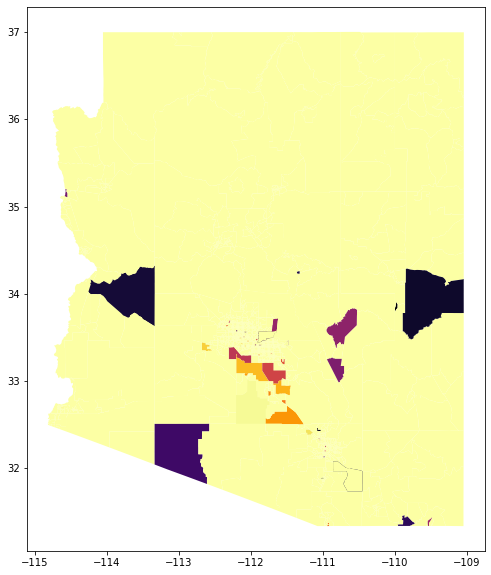

In [108]:
import matplotlib.pyplot as plt

# Replace NaN values with 'grey'
filled_df = joined_df.fillna('grey')

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filled_df.plot(column='PM25', ax=ax, legend=False, cmap='inferno')
plt.show()

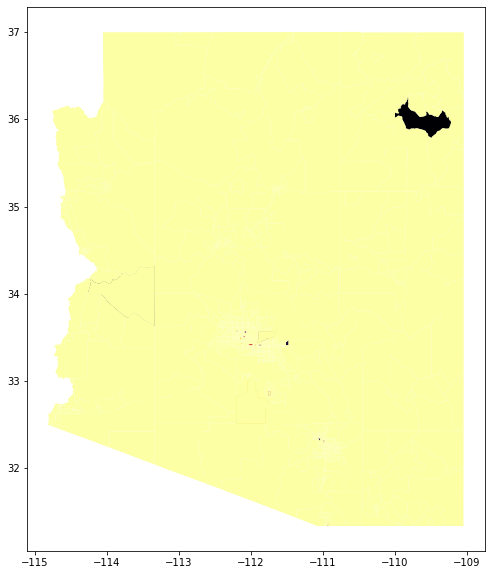

In [107]:
import matplotlib.pyplot as plt

# Replace NaN values with 'grey'
filled_df = joined_df.fillna('grey')

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filled_df.plot(column='PM10', ax=ax, legend=False, cmap='inferno')
plt.show()

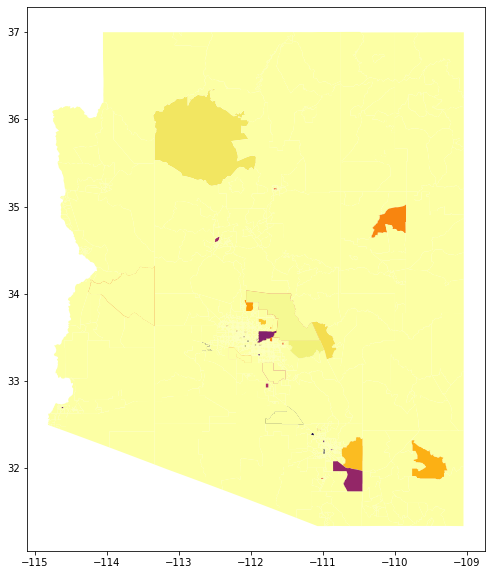

In [105]:
import matplotlib.pyplot as plt

# Replace NaN values with 'grey'
filled_df = joined_df.fillna('grey')

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filled_df.plot(column='OZ', ax=ax, legend=False, cmap='inferno')
plt.show()

In [48]:
joined_df.to_csv('AQI_CT.csv')

In [53]:
from sklearn.impute import KNNImputer

# Calculate the centroid of each polygon
joined_df['centroid'] = joined_df['geometry'].centroid

# Separate the x and y coordinates of the centroid
joined_df['x'] = joined_df['centroid'].x
joined_df['y'] = joined_df['centroid'].y

# Impute the missing values in the OZ column using KNN
imputer = KNNImputer(n_neighbors=5, weights='uniform')
joined_df['OZ'] = imputer.fit_transform(joined_df[['OZ', 'x', 'y']])[:, 0]
joined_df['PM25'] = imputer.fit_transform(joined_df[['PM25', 'x', 'y']])[:, 0]
joined_df['PM10'] = imputer.fit_transform(joined_df[['PM10', 'x', 'y']])[:, 0]


<ipython-input-53-36fc8d0361c1>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  joined_df['centroid'] = joined_df['geometry'].centroid


In [55]:
joined_df.to_csv('AQI_CT_imputed.csv')

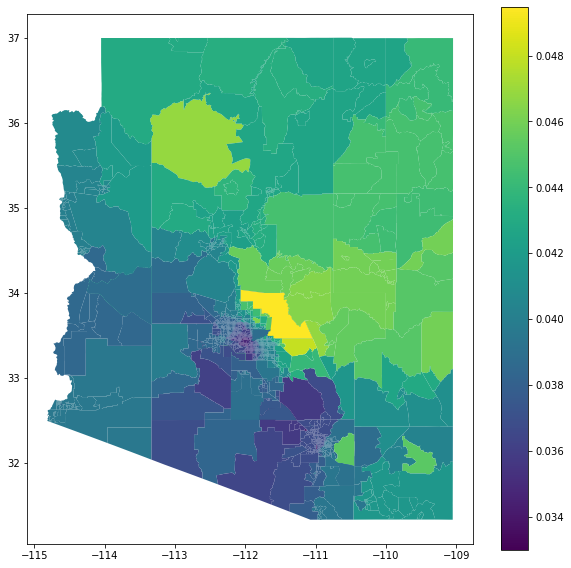

In [57]:
# Plot the data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
joined_df.plot(column='OZ', ax=ax, legend=True, cmap='viridis')
plt.show()

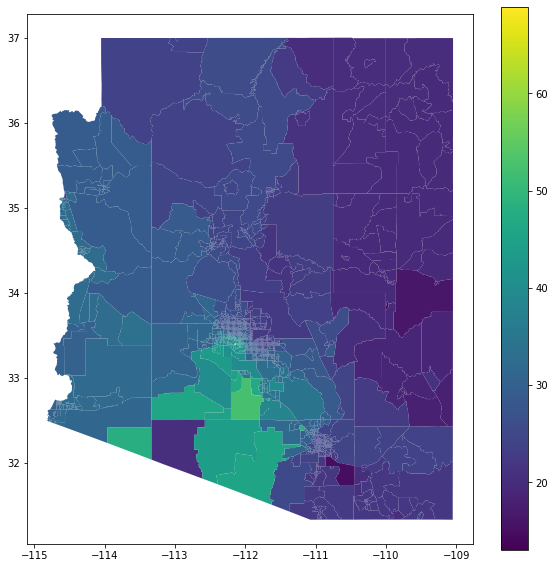

In [72]:
# Plot the data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
joined_df.plot(column='PM25', ax=ax, legend=True, cmap='viridis')
plt.show()

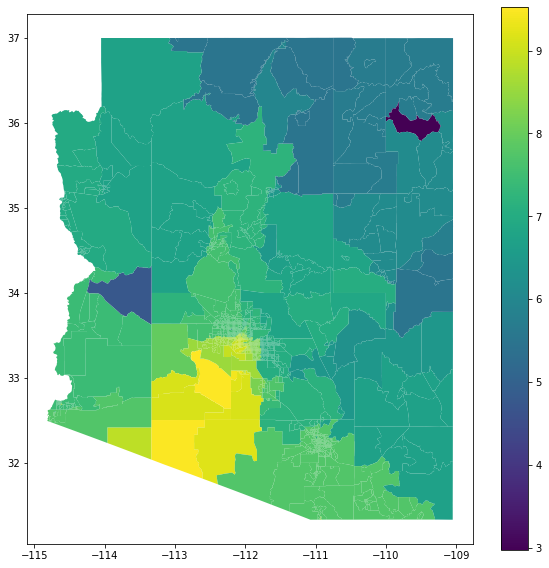

In [74]:
# Plot the data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
joined_df.plot(column='PM10', ax=ax, legend=True, cmap='viridis')
plt.show()

In [65]:
joined_df = joined_df.drop(columns=['x','y'])

In [66]:
joined_df.columns

Index(['GEOID', 'NAMELSAD', 'geometry', 'OZ', 'PM25', 'PM10', 'centroid'], dtype='object')

In [69]:
joined_df = joined_df.drop_duplicates(subset='GEOID', keep='first')

In [70]:
joined_df

,GEOID,NAMELSAD,geometry,OZ,PM25,PM10,centroid
0,04015950500,Census Tract 9505,"POLYGON ((-114.67888 35.50137, -114.67883 35.5...",0.040446,29.008305,6.950098,POINT (-114.37185 35.37591)
1,04015954900,Census Tract 9549,"POLYGON ((-114.10394 35.26982, -114.10256 35.2...",0.040446,29.008305,6.950098,POINT (-114.05951 35.24403)
2,04015951800,Census Tract 9518,"POLYGON ((-114.64029 35.09852, -114.64012 35.0...",0.040051,32.435917,6.950098,POINT (-114.61819 35.09516)
3,04015952400,Census Tract 9524,"POLYGON ((-114.48778 34.71722, -114.48622 34.7...",0.040051,32.435917,6.950098,POINT (-114.35053 34.62240)
4,04027012100,Census Tract 121,"POLYGON ((-114.47325 33.02788, -114.45989 33.0...",0.039609,32.002796,7.434429,POINT (-113.84967 33.08087)
...,...,...,...,...,...,...,...
1760,04019003707,Census Tract 37.07,"POLYGON ((-110.96121 32.15597, -110.96106 32.1...",0.038066,24.246604,7.752676,POINT (-110.95229 32.15183)
1761,04019004067,Census Tract 40.67,"POLYGON ((-110.85792 32.23590, -110.85789 32.2...",0.039038,24.561594,7.752676,POINT (-110.84905 32.24057)
1762,04019003303,Census Tract 33.03,"POLYGON ((-110.87547 32.22881, -110.87546 32.2...",0.039038,24.561594,7.752676,POINT (-110.86664 32.22061)
1763,04019003706,Census Tract 37.06,"POLYGON ((-110.96124 32.16335, -110.96108 32.1...",0.038066,24.246604,7.752676,POINT (-110.95232 32.15965)


In [71]:
joined_df.to_csv('AQI_CT_imputed.csv')